# Predicting Heart Disease Mortality

## Executive Summary

The document presents an analysis of the rate of heart disease across the United States at the county-level, and tring to build a regression model to predict heart disease rate. There are 3198 observations in our training set. Each observation has 33 features and 1 label.

We would first simply explore the data, including finding out how many missing values in the training set, calculating descriptive statistics, etc. Then, we would create some visualization of the data. By the visualizaion, we might be able to identify some potential relationships. 

After exploring the data, we would do some necessary steps for building the model, including filling the missing values and getting dummies of categorical features.

Next, we can build our model. Our model is an ensemble of several models, including RandomForestRegressor, XGBRegressor, GradientBoostingRegressor, LGBMRegressor, LassoCV, Ridge, LassoLarsCV, and ElasticNetCV. After building the model, we could also discover some relationships by plotting feature importance.

Although there are many features in the data, the analysis tells us only some are significant:

'demo__pct_adults_less_than_a_high_school_diploma'- four tree-based model identify as top 3 important feature, having 0.527382 correlation cofficient(CC) with heart diease rate.

'econ__pct_civilian_labor'- four tree-based model identify as top 10 important feature, having -0.476644 CC with heart diease rate.

'health__pct_adult_smoking'- four tree-based model identify as top 10 important feature, having 0.497063 CC with heart diease rate.

'health__pct_physical_inacticity'- having top 3 absolute CC with heart diease rate (0.650305) high importance in RandomForestRegressor.

'health__pct_diabetes'- having top 3 absolute CC with heart diease rate (0.631765) and high importance in RandomForestRegressor. 0.631765

'health__pct_adult_obesity'- having top 3 absolute CC with heart diease rate (0.593775) high importance in RandomForestRegressor. 	


##### Notes 

Actually, I make the analysis and write the document on Jupyter Notebook, then copy the document to Microsoft Word, then convert to PDF. Thus, there might be some distortion. The words with grey background is the code(with In[number]: at beginning) and the following is the output(with Out[number]: at beginning). 

## Data Exploration 

#####  Import Package 

First of all, we import the packages that we would use to get visualization and compute the statistic of the data.

In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns=100

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot

In [2]:
params={
    'axes.labelsize':"large",
    'xtick.labelsize':'x-large',
    'legend.fontsize':20,
    'figure.dpi':150,
    'figure.figsize':[25,7]
}
plot.rcParams.update(params)

In [3]:
#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

##### Read Data

In [4]:
#read the training values
x=pd.read_csv('DAT102x_Predicting_Heart_Disease_Mortality_-_Training_values.csv',index_col=0)

In [5]:
#read training labels
y=pd.read_csv('DAT102x_Predicting_Heart_Disease_Mortality_-_Training_labels.csv',index_col=0)

In [6]:
data=pd.concat([x,y],axis=1)

##### First glance

In [7]:
x.shape

(3198, 33)

From the code on the above, we can know that we have 3198 samples and 33 features. 

In [8]:
x.columns.tolist()

['area__rucc',
 'area__urban_influence',
 'econ__economic_typology',
 'econ__pct_civilian_labor',
 'econ__pct_unemployment',
 'econ__pct_uninsured_adults',
 'econ__pct_uninsured_children',
 'demo__pct_female',
 'demo__pct_below_18_years_of_age',
 'demo__pct_aged_65_years_and_older',
 'demo__pct_hispanic',
 'demo__pct_non_hispanic_african_american',
 'demo__pct_non_hispanic_white',
 'demo__pct_american_indian_or_alaskan_native',
 'demo__pct_asian',
 'demo__pct_adults_less_than_a_high_school_diploma',
 'demo__pct_adults_with_high_school_diploma',
 'demo__pct_adults_with_some_college',
 'demo__pct_adults_bachelors_or_higher',
 'demo__birth_rate_per_1k',
 'demo__death_rate_per_1k',
 'health__pct_adult_obesity',
 'health__pct_adult_smoking',
 'health__pct_diabetes',
 'health__pct_low_birthweight',
 'health__pct_excessive_drinking',
 'health__pct_physical_inacticity',
 'health__air_pollution_particulate_matter',
 'health__homicides_per_100k',
 'health__motor_vehicle_crash_deaths_per_100k',
 

The features' name are all listed on the above. The features are named straight forward. We can almost know what the feature records from its name. For example, 'health__pct_adult_obesity' stands for 'Percent of adults who meet clinical definition of obese'. If you want to know the precise definition of the feature, you can refer the  https://datasciencecapstone.org/competitions/7/heart-disease/page/23/.

Next, we want to know the data type of each feature.

In [9]:
x.dtypes

area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school_diploma    float64
demo__pct_adults_with_high_school_diplom

In [10]:
#A list that record the name of numerical features
numerical_features=x.dtypes[x.dtypes=='float64'].index.tolist()

The feature with data type of 'float64' is numerical data. As for 'object', it means that the feature is categorical data.(Sometimes, if there are some strange recordings in the numerical feature, for example, 'a' in the 'demo__birth_rate_per_1k', the code will also identify the dtype as object. But things are simple here. Object stands for categorical data.) 

Next, do some simple statistics.

In [11]:
x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
econ__pct_civilian_labor,3198.0,0.467191,0.074400,0.207000,0.420000,0.468000,0.514000,1.000000
econ__pct_unemployment,3198.0,0.059696,0.022947,0.010000,0.044000,0.057000,0.072000,0.248000
econ__pct_uninsured_adults,3196.0,0.217463,0.067362,0.046000,0.166000,0.216000,0.261000,0.496000
econ__pct_uninsured_children,3196.0,0.086067,0.039849,0.012000,0.057000,0.077000,0.106000,0.281000
demo__pct_female,3196.0,0.498811,0.024399,0.278000,0.493000,0.503000,0.512000,0.573000
demo__pct_below_18_years_of_age,3196.0,0.227715,0.034282,0.092000,0.206000,0.226000,0.246000,0.417000
demo__pct_aged_65_years_and_older,3196.0,0.170043,0.043694,0.045000,0.141000,0.167000,0.195000,0.346000
demo__pct_hispanic,3196.0,0.090207,0.142763,0.000000,0.019000,0.035000,0.087000,0.932000
demo__pct_non_hispanic_african_american,3196.0,0.091046,0.147165,0.000000,0.006000,0.022000,0.096000,0.858000
demo__pct_non_hispanic_white,3196.0,0.769989,0.207850,0.053000,0.649000,0.853000,0.936250,0.990000


We can find that some features' 'count' are not equal to 3198. It means that there are some missing values in the features. We should figure out how many missing values in each feature.

In [12]:
x.isnull().sum()

area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_school_diploma              0
demo__pct_adults_with_some_coll

As the code showed, many features have two missing values, and some features have hundreds of missing values. In addition, look at 'health__homicides_per_100k', it has 1967 missing values! We only have 3198 rows, and 1967 is missing in 'health__homicides_per_100k'. It means that half of them are lost! I guess that it is really hard to record the homicide rate. Before we build a model to predict the label, we should use some method to fill in the missing values. However, we would ignore the missing values and keep on exploaring data.

For numerical data, we do some simple statistics. As for categorical data, we can figure out how many kinds of value in them and how many in each kind.

For 'area__rucc'

In [13]:
x['area__rucc'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

For 'area__urban_influence'

In [14]:
x['area__urban_influence'].value_counts()

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

For 'econ__economic_typology'

In [15]:
x['econ__economic_typology'].value_counts()

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

For 'yr'

In [16]:
x['yr'].value_counts()

a    1599
b    1599
Name: yr, dtype: int64

So far, we are focus on training _values. It is time to deal with traing_labels.

In [17]:
y.head(3)

,heart_disease_mortality_per_100k
row_id,
0,312
1,257
4,195


In [18]:
y.describe()

,heart_disease_mortality_per_100k
count,3198.000000
mean,279.369293
std,58.953338
min,109.000000
25%,237.000000
50%,275.000000
75%,317.000000
max,512.000000


In [19]:
#For a normal traing_lables, there should not exist any missing value.
#Thus, this is just for checking.
y.isnull().sum()

heart_disease_mortality_per_100k    0
dtype: int64

##### Data Visualization 

First, we plot a histgram of traing_labels. If there is no sampling bias, we could expect that the test_labels would detribute like traing_labels. At least, what we predict should looks like what we use to predict.

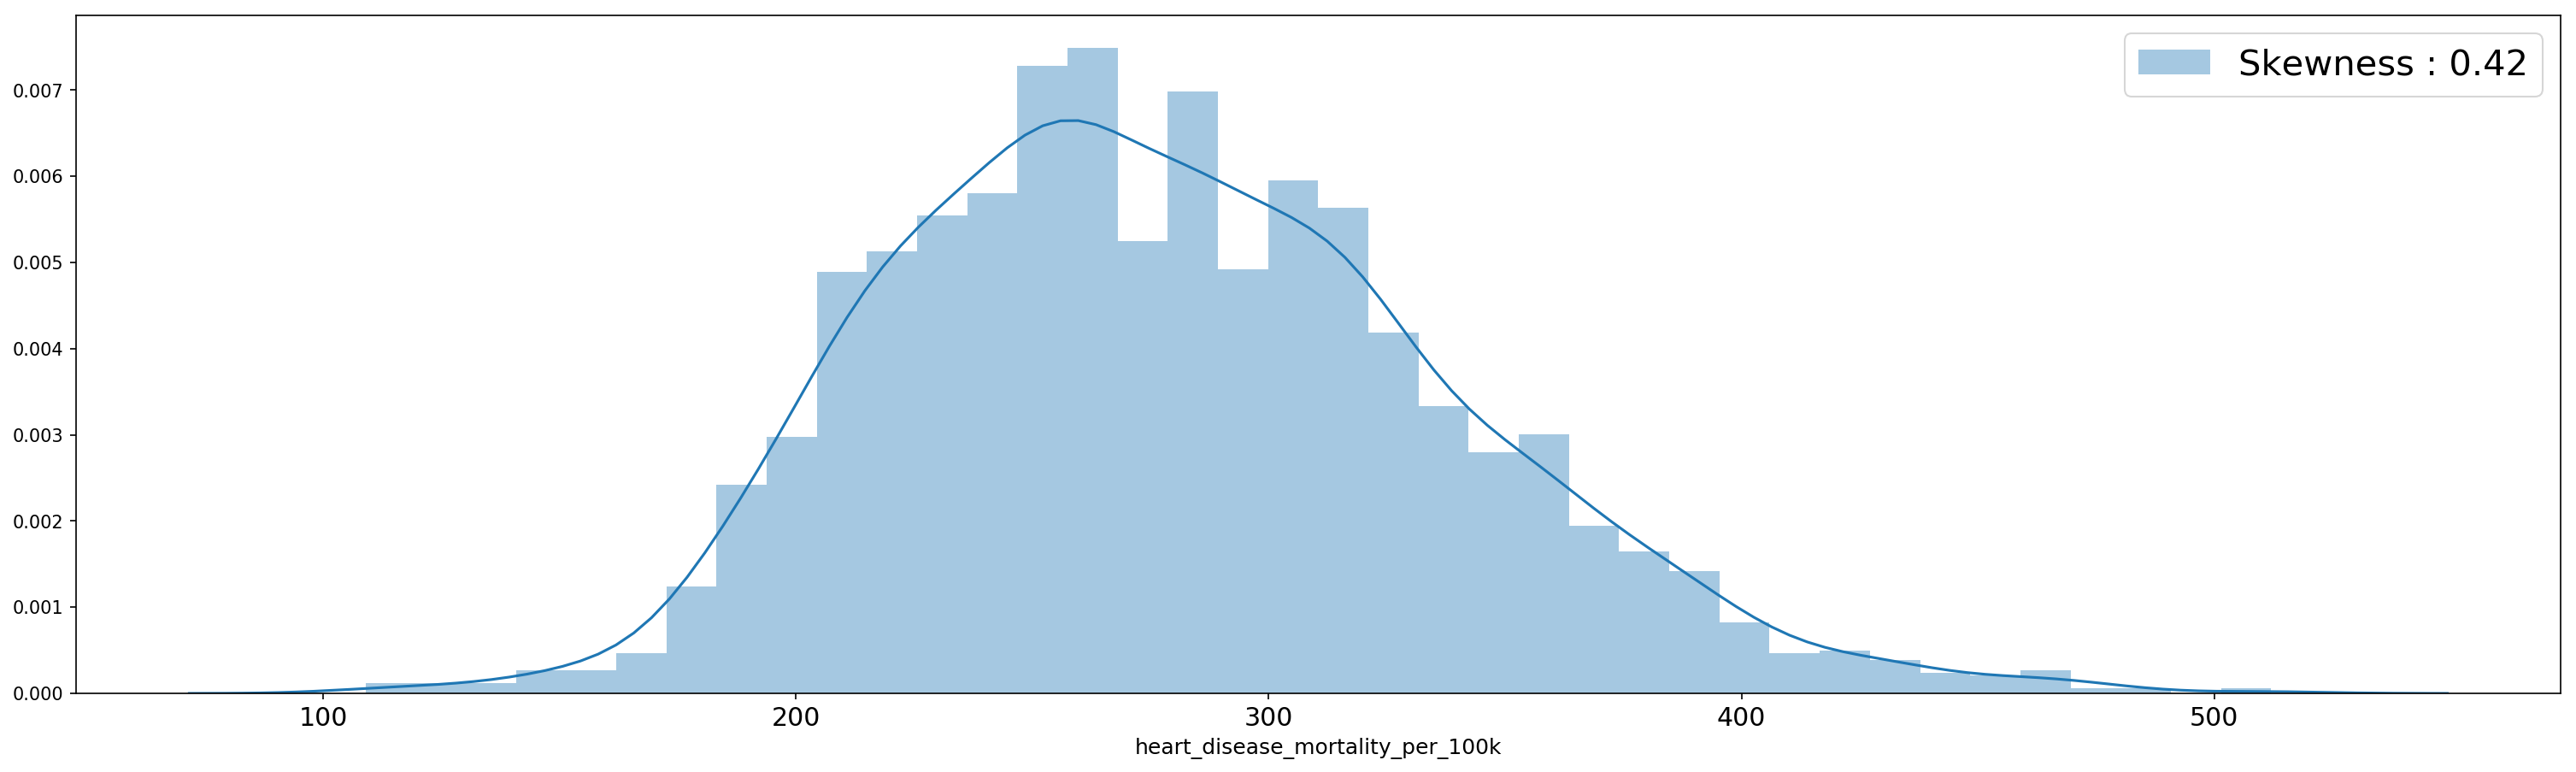

In [20]:
sns.distplot(y['heart_disease_mortality_per_100k'],
             label="Skewness : %.2f"%(y['heart_disease_mortality_per_100k']\
                                      .skew())).legend(loc="best")

We can find that 'heart_disease_morality_per_100k' looks like normal distribution. And from the positive skewness, we can infer that labels distribute more on the low value.

Next, we plot the distribution relationship between each numerical feature and label. 

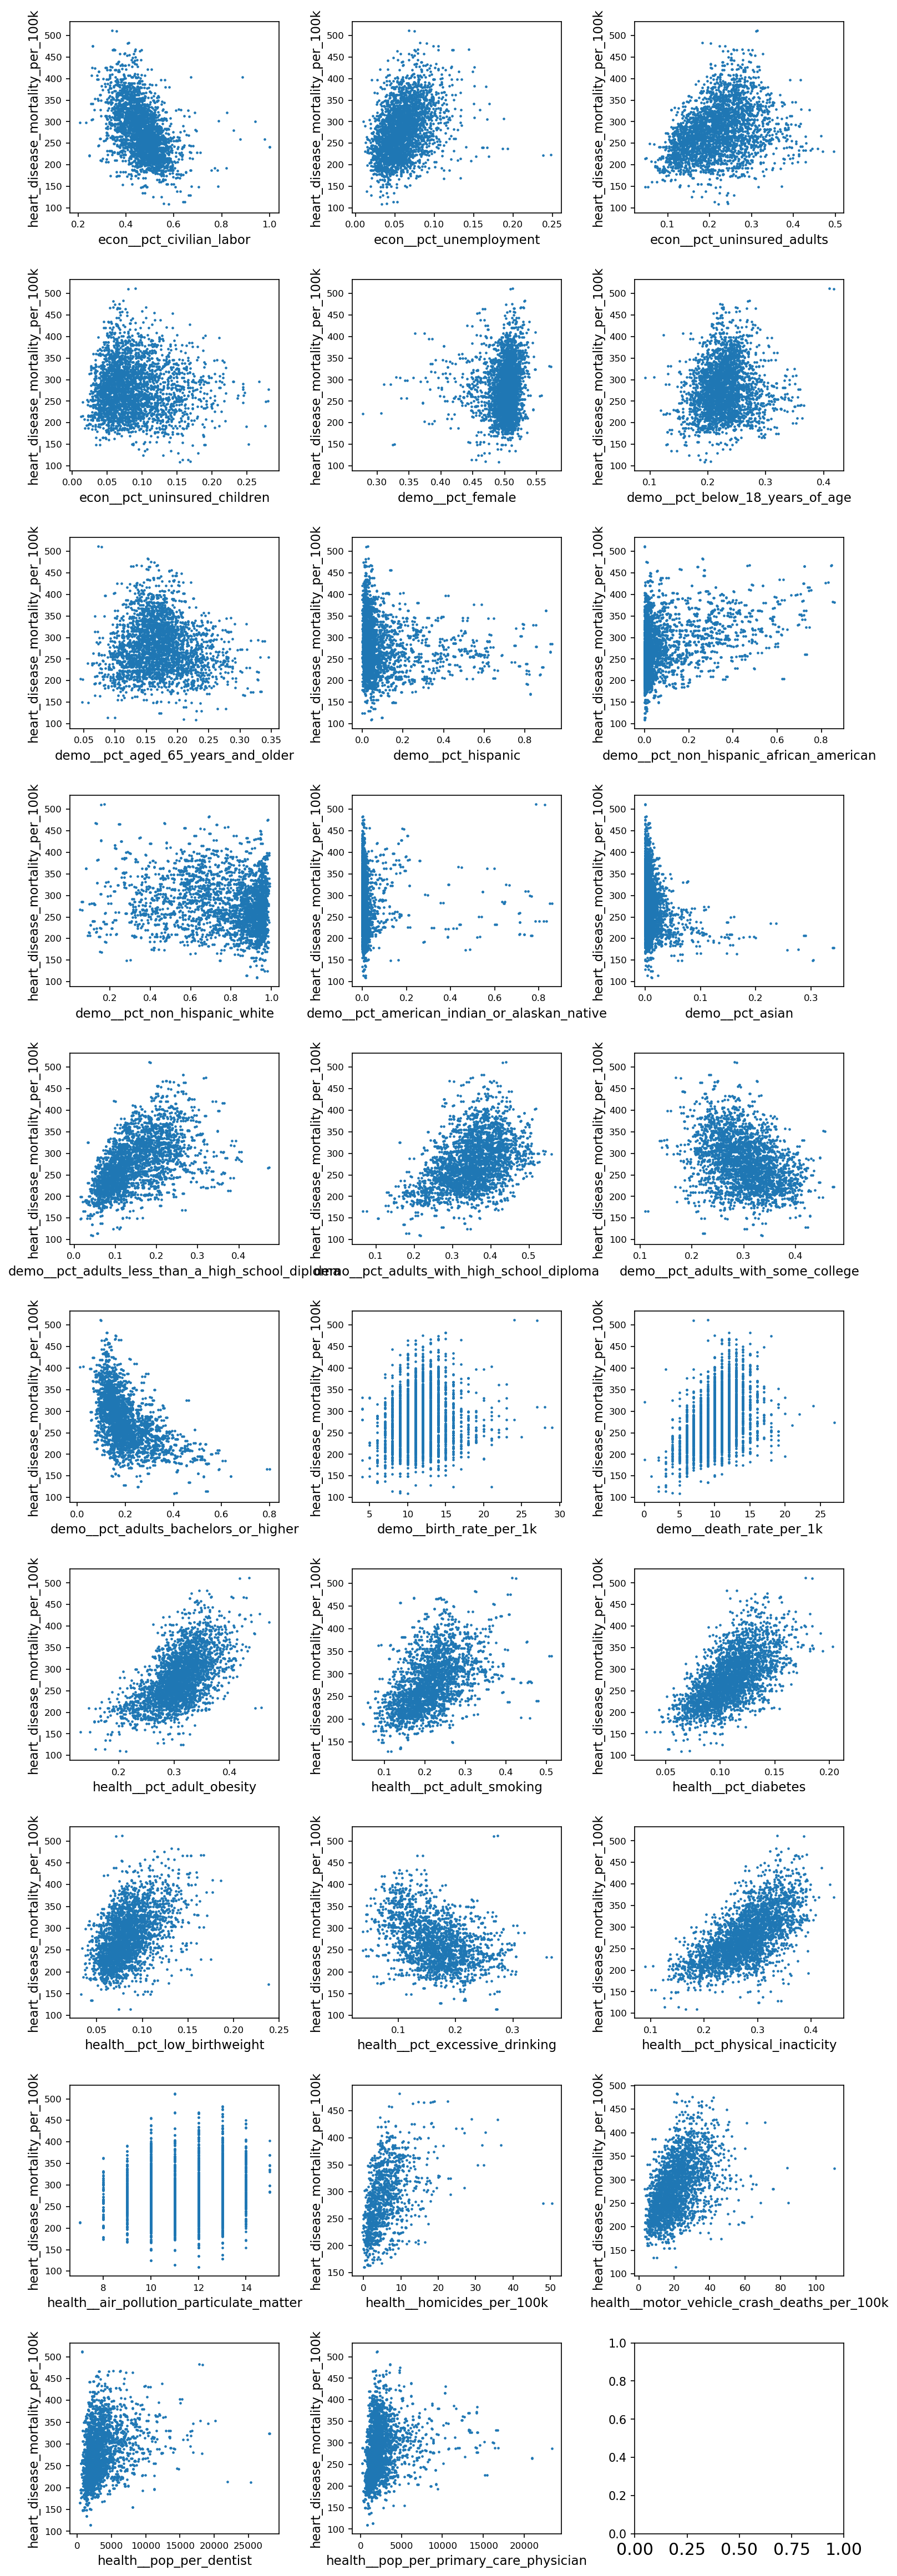

In [21]:
f, axes = plt.subplots(10, 3,figsize=(6*2,20*2))
plt.subplots_adjust( wspace=0.35, hspace=0.35)

for i,ax in zip(numerical_features,axes.flat):
        
        ax.scatter(x = x[i], y = y['heart_disease_mortality_per_100k'],s=1.5)
        ax.set_xlabel(i,size=5.5*2)
        ax.set_ylabel('heart_disease_mortality_per_100k',size=5.5*2)
        ax.tick_params(labelsize=8)
        

From the scatter plots on the above, I guess that obesity, smoking, diabetes and physical inacticity are important features, since they seems to have strong positive correlation with heart_disease_mortality. In addition, from the plots, we can identify some outliers. Before we build a model, we shall drop the outliers in order to get better performance. However, there is always a problem that does the outlier is a important point indicating something or just a noise in data. Thus, I would drop the outlier by my preference. 

To confirm my guess, we can just calculate the correlation coefficient. 

In [22]:
temp=data.corr().loc[['heart_disease_mortality_per_100k']]
temp.transpose().sort_values(by='heart_disease_mortality_per_100k', ascending=False)

,heart_disease_mortality_per_100k
heart_disease_mortality_per_100k,1.000000
health__pct_physical_inacticity,0.650305
health__pct_diabetes,0.631765
health__pct_adult_obesity,0.593775
demo__pct_adults_less_than_a_high_school_diploma,0.527382
health__pct_adult_smoking,0.497063
health__pct_low_birthweight,0.476757
health__motor_vehicle_crash_deaths_per_100k,0.459803
demo__death_rate_per_1k,0.444757
health__homicides_per_100k,0.441164


For categorical features, we would plot violinplot.

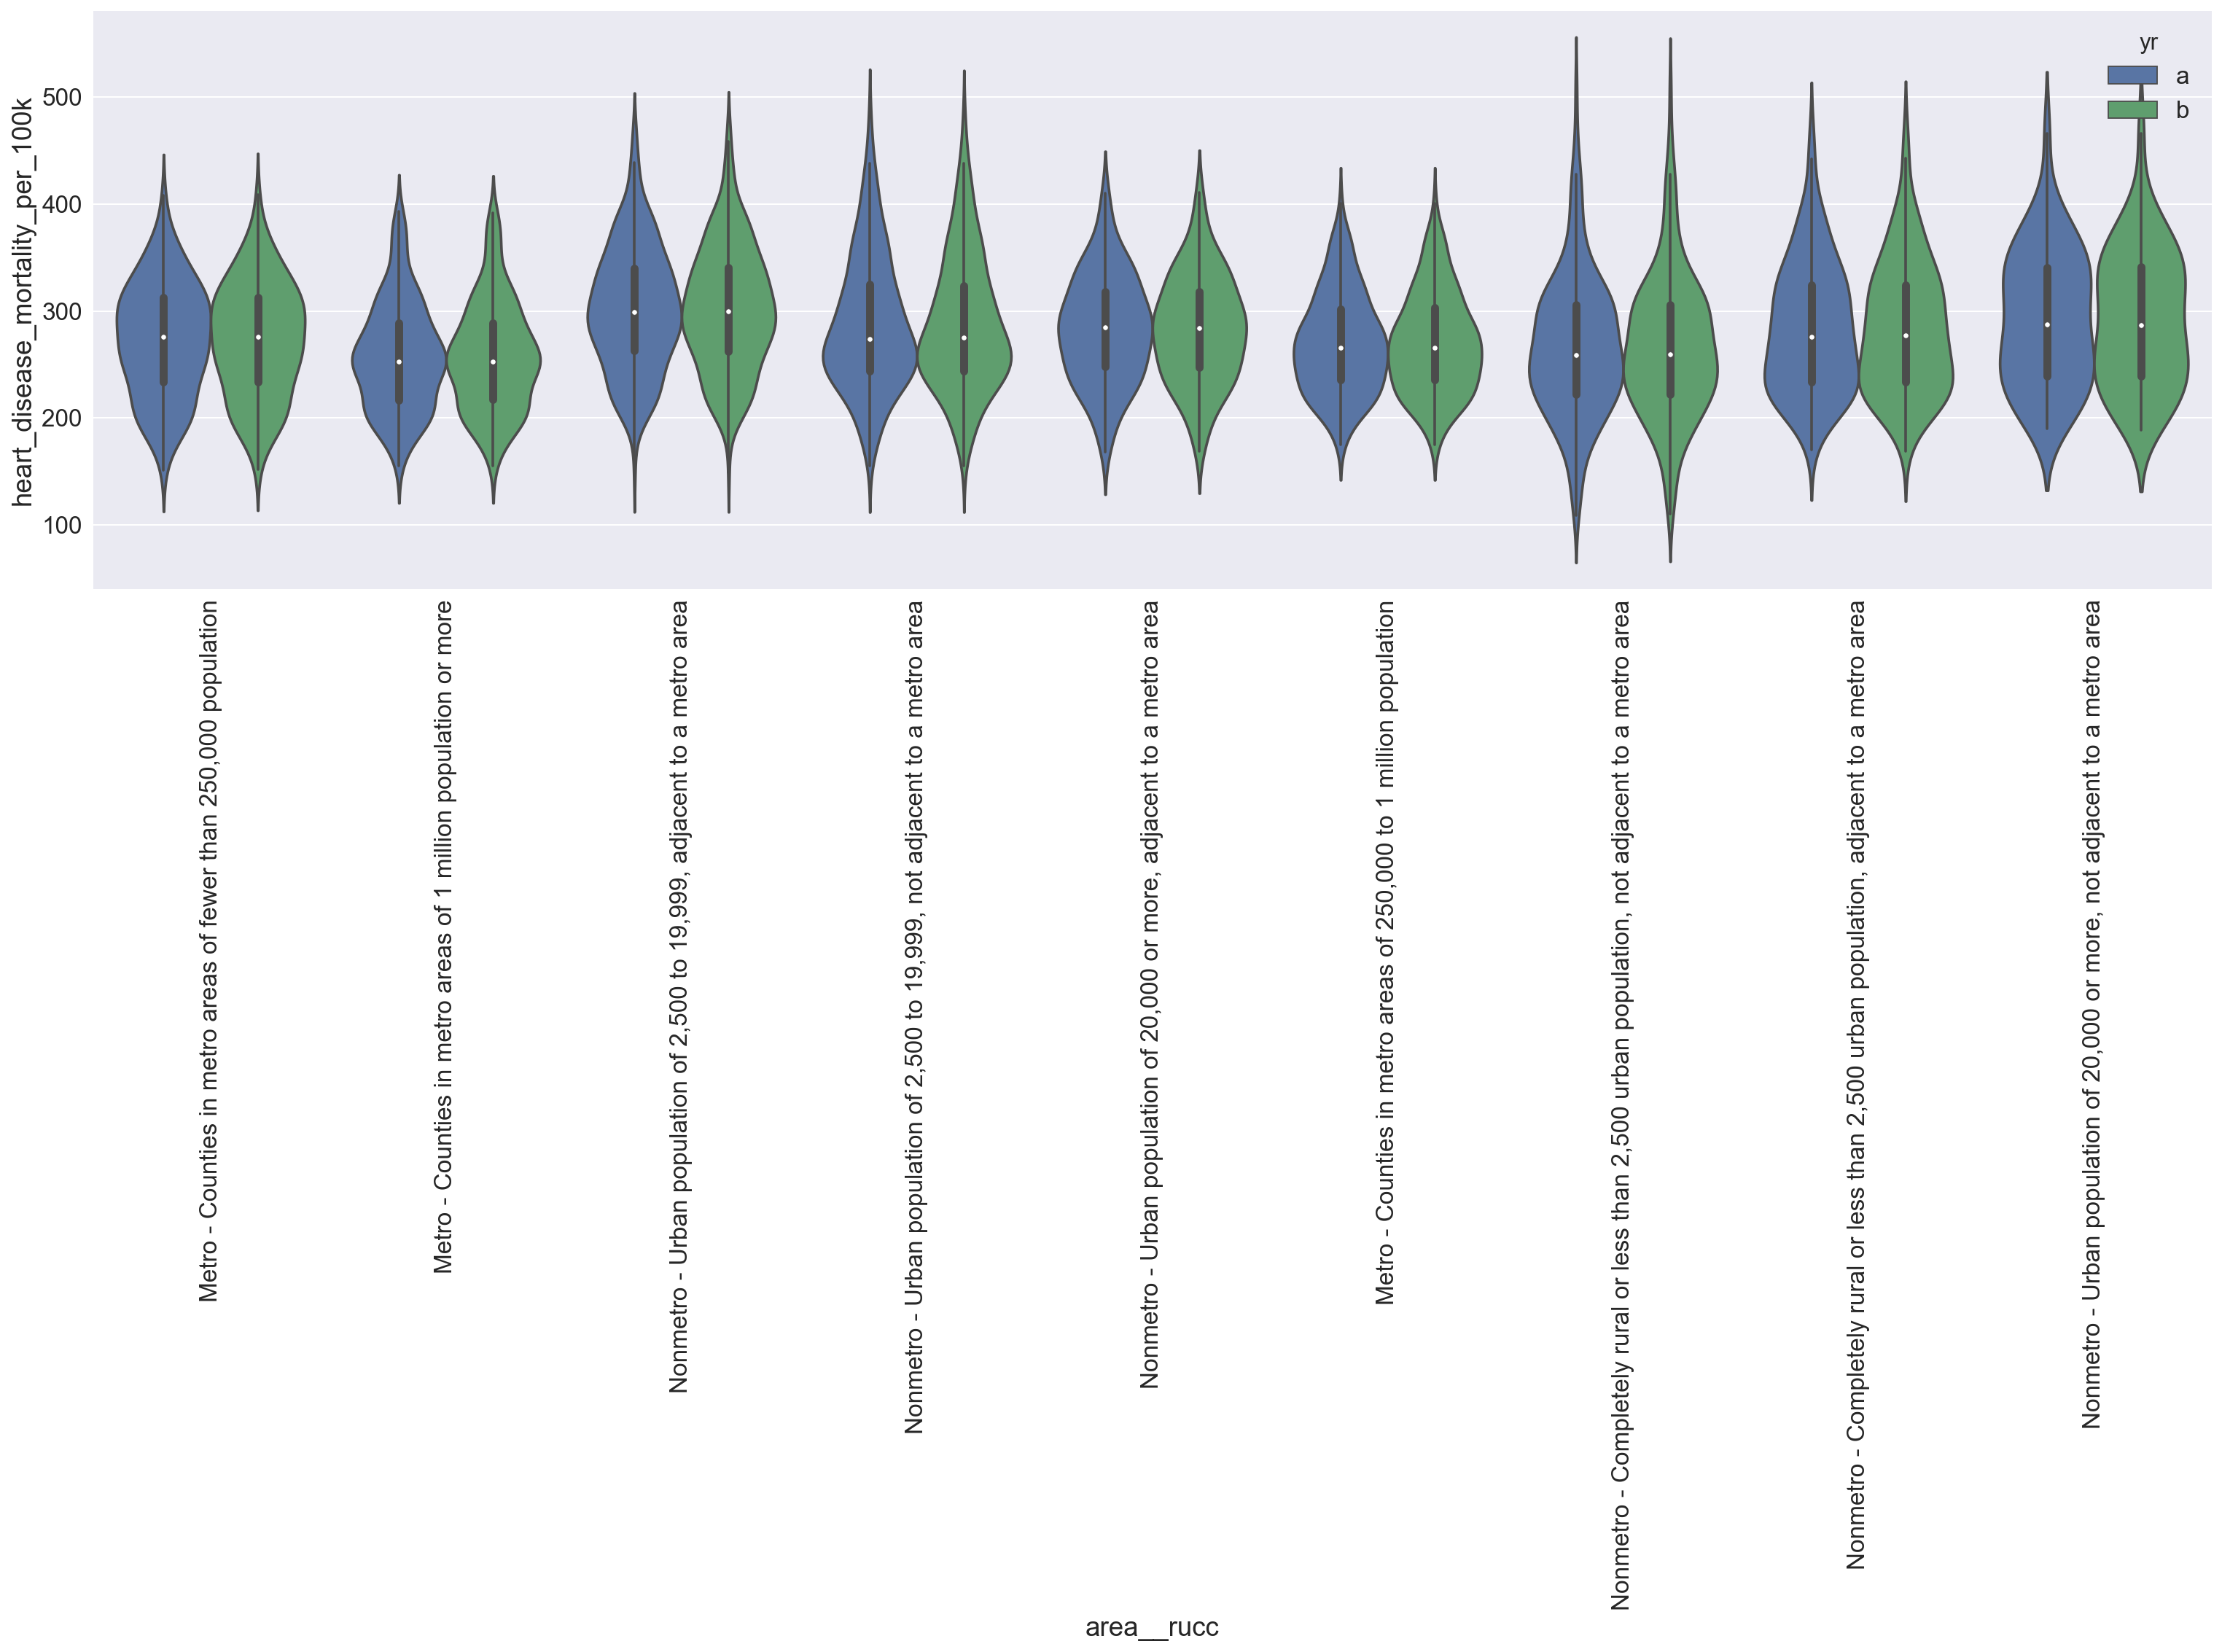

In [23]:
sns.set(font_scale = 1.6)
g=sns.violinplot(x='area__rucc',y='heart_disease_mortality_per_100k',hue='yr',data=data)
g1=g.set_xticklabels(g.get_xticklabels(),rotation=90)

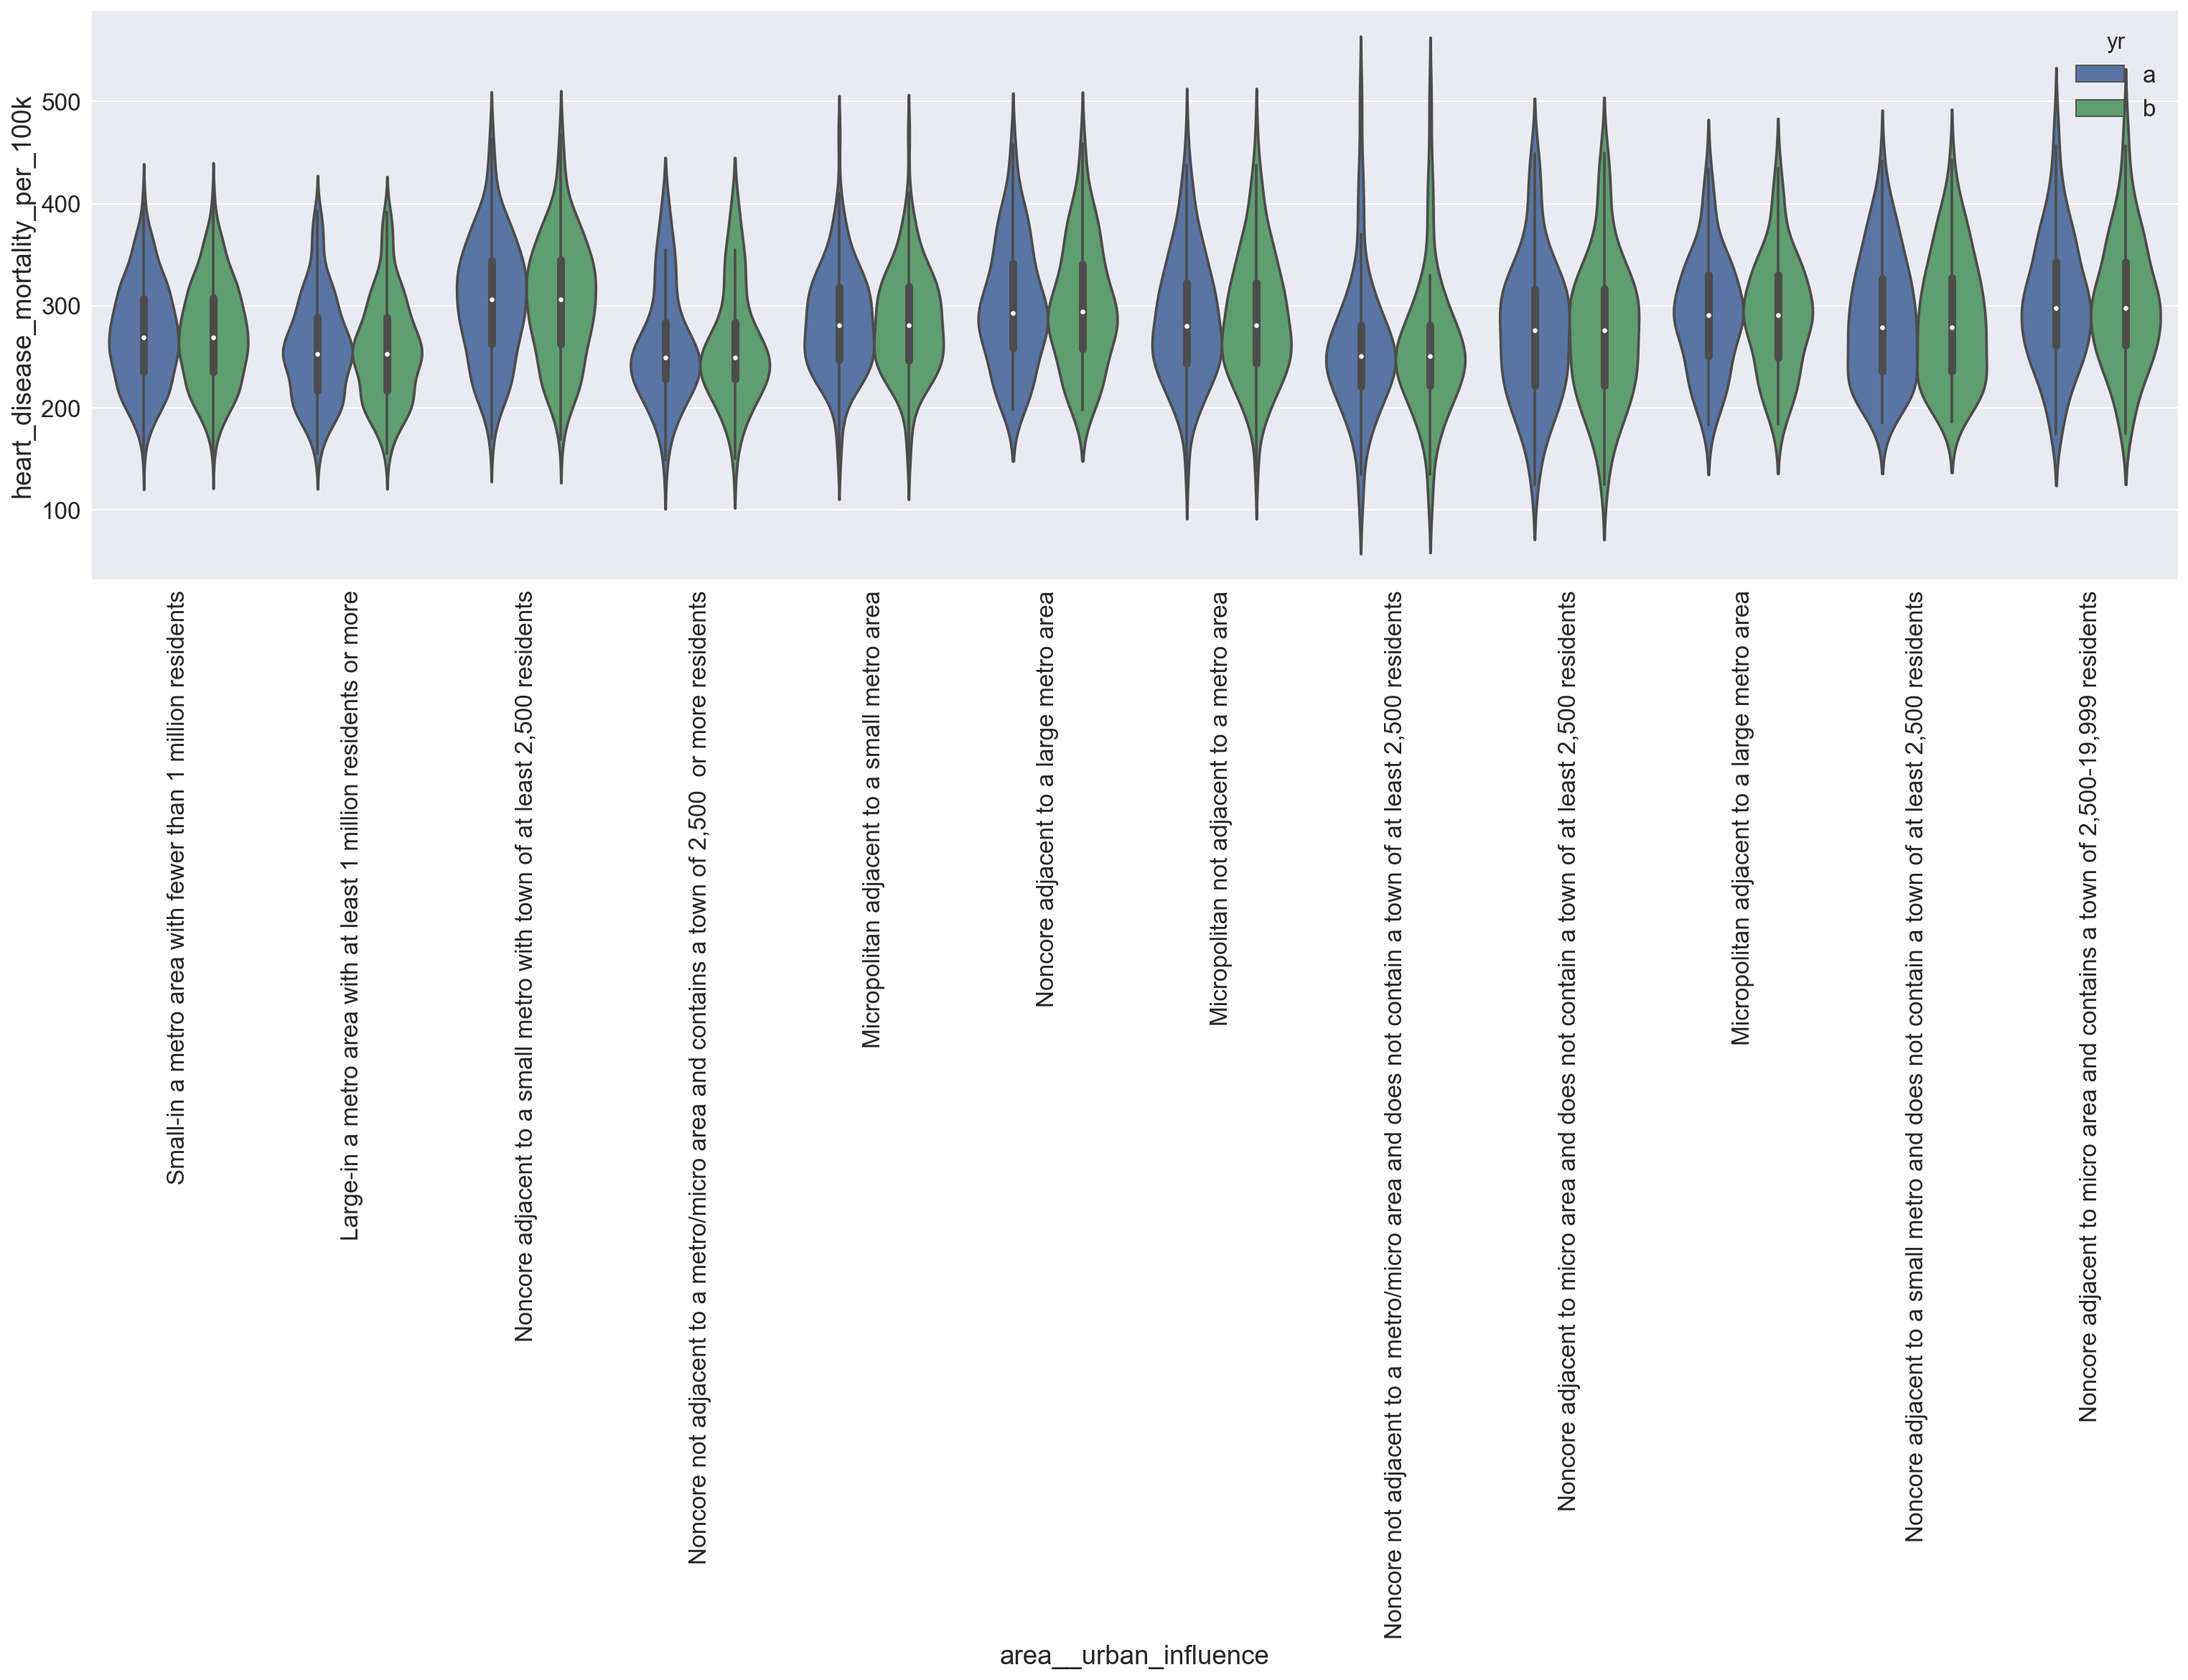

In [24]:
sns.set(font_scale = 1.6)
g=sns.violinplot(x='area__urban_influence',y='heart_disease_mortality_per_100k',hue='yr',data=data)
g1=g.set_xticklabels(g.get_xticklabels(),rotation=90)

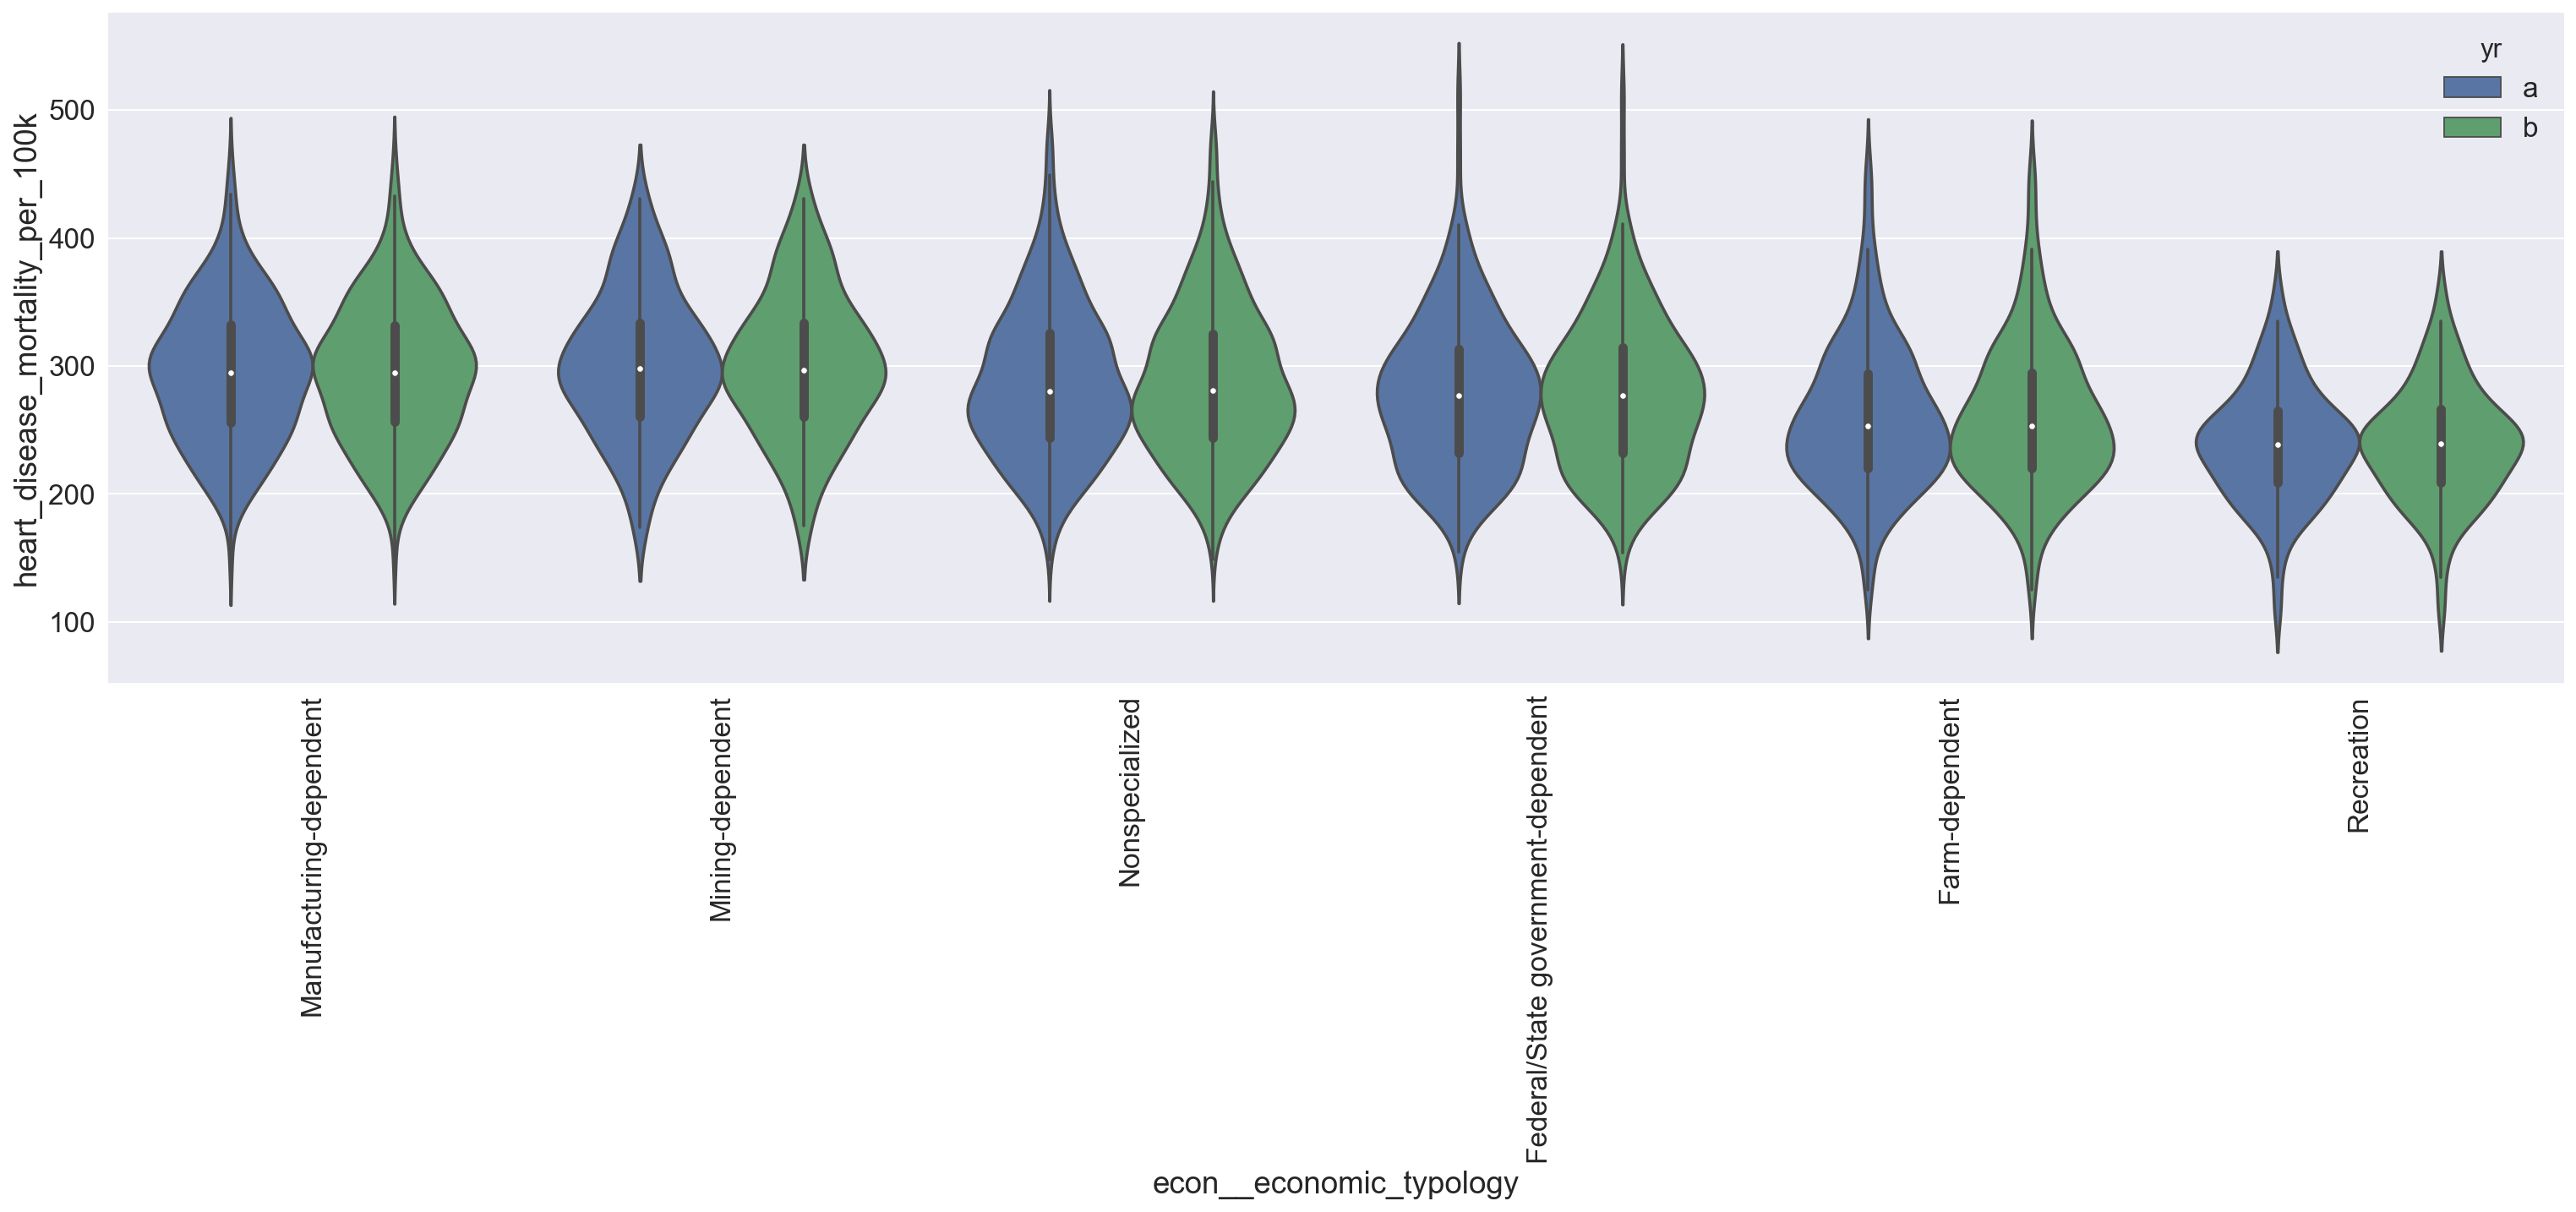

In [25]:
sns.set(font_scale = 1.6)
g=sns.violinplot(x='econ__economic_typology',y='heart_disease_mortality_per_100k',hue='yr',data=data)
g1=g.set_xticklabels(g.get_xticklabels(),rotation=90)

We can find that for categorical data, there is no large difference between two years.

##  Preparing Data

In this section, we would prepare our dataset in order to make it being able to fit the models.

##### Drop homicide rate

At usually, we should use all the features we could get, trusting that the model would select important features by itself. However, sometimes, for some reasons, we might reduced the feacture number. One reason is making the computation faster beacause having more feactures the model computes more slower. Or, we know there are problems in the feature then we should drop it, as we drop the outliers. Here, I would drop the homicide rate beacause half of them are missing. I think it might produce some bias.

In [26]:
x.drop('health__homicides_per_100k',axis=1,inplace=True)

##### Fill in Missing Values 

We have known that there are missing values in some features. Missing values should be filled because the models can not work with NaN. How to fill in missing values might be a big knowledge.(For sure, the best is that there is no missing values.) The simplest and most using way I think is filling mean or median. As for filling mean or median is according to your judgement. If the data looks like continuous, I will fill mean; if the data looks like discrete, I will fill median. Another way I know is building a model to predict the missing values, but it does not guarantee a better performance.

Here, I simply fill missing values with mean or median, although some features have large number of missing values.

In [27]:
x['econ__pct_uninsured_adults']=x['econ__pct_uninsured_adults'].fillna(x['econ__pct_uninsured_adults'].mean())
x['econ__pct_uninsured_children']=x['econ__pct_uninsured_children'].fillna(x['econ__pct_uninsured_children'].mean())
x['demo__pct_female']=x['demo__pct_female'].fillna(x['demo__pct_female'].mean())
x['demo__pct_below_18_years_of_age']=x['demo__pct_below_18_years_of_age'].fillna(x['demo__pct_below_18_years_of_age'].mean())
x['demo__pct_aged_65_years_and_older']=x['demo__pct_aged_65_years_and_older'].fillna(x['demo__pct_aged_65_years_and_older'].mean())
x['demo__pct_hispanic']=x['demo__pct_hispanic'].fillna(x['demo__pct_hispanic'].mean())
x['demo__pct_non_hispanic_african_american']=x['demo__pct_non_hispanic_african_american'].fillna(x['demo__pct_non_hispanic_african_american'].mean())
x['demo__pct_non_hispanic_white']=x['demo__pct_non_hispanic_white'].fillna(x['demo__pct_non_hispanic_white'].mean())
x['demo__pct_american_indian_or_alaskan_native']=x['demo__pct_american_indian_or_alaskan_native'].fillna(x['demo__pct_american_indian_or_alaskan_native'].mean())
x['demo__pct_asian']=x['demo__pct_asian'].fillna(x['demo__pct_asian'].mean())
x['health__pct_adult_obesity']=x['health__pct_adult_obesity'].fillna(x['health__pct_adult_obesity'].mean())
x['health__pct_diabetes']=x['health__pct_diabetes'].fillna(x['health__pct_diabetes'].mean())
x['health__pct_physical_inacticity']=x['health__pct_physical_inacticity'].fillna(x['health__pct_physical_inacticity'].mean())

In [28]:
#Having large number of missing values
x['health__pct_adult_smoking']=x['health__pct_adult_smoking'].fillna(x['health__pct_adult_smoking'].median())
x['health__pct_low_birthweight']=x['health__pct_low_birthweight'].fillna(x['health__pct_low_birthweight'].median())
x['health__pct_excessive_drinking']=x['health__pct_excessive_drinking'].fillna(x['health__pct_excessive_drinking'].mean())
x['health__air_pollution_particulate_matter']=x['health__air_pollution_particulate_matter'].fillna(x['health__air_pollution_particulate_matter'].median())
x['health__motor_vehicle_crash_deaths_per_100k']=x['health__motor_vehicle_crash_deaths_per_100k'].fillna(x['health__motor_vehicle_crash_deaths_per_100k'].mean())
x['health__pop_per_dentist']=x['health__pop_per_dentist'].fillna(x['health__pop_per_dentist'].median())
x['health__pop_per_primary_care_physician']=x['health__pop_per_primary_care_physician'].fillna(x['health__pop_per_primary_care_physician'].median())


In [29]:
#Because I forget that I should fill NaNs in 'data' not in 'x', I definite the 'data' again.
data=pd.concat([x,y],axis=1)

##### Drop Outliers 

Drop the outliers I identified by the scatter plots. 

In [30]:
data=data.drop(data[data['econ__pct_unemployment']>0.20].index)
data=data.drop(data[(data['demo__pct_below_18_years_of_age']>0.40)&(data['heart_disease_mortality_per_100k']>500)].index)
data=data.drop(data[(data['health__pct_adult_obesity']>0.40)&(data['heart_disease_mortality_per_100k']<230)].index)
data=data.drop(data[(data['health__pct_low_birthweight']>0.20)&(data['heart_disease_mortality_per_100k']<200)].index)
data=data.drop(data[(data['health__motor_vehicle_crash_deaths_per_100k']>100)&(data['heart_disease_mortality_per_100k']<350)].index)

##### Get Dummies 

For categorical features, we must make them become numbers before model can deal with them. There are also many ways to encode categorical data. The simplest way is to use pandas building in function 'get_dummies.'  

In [31]:
def process_area__rucc(data):
    area_rucc_dummies=pd.get_dummies(data['area__rucc'],prefix="area__rucc")
    
    data=pd.concat([data,area_rucc_dummies],axis=1)
    data.drop('area__rucc',axis=1,inplace=True)
    
    return data
data=process_area__rucc(data)

    

In [32]:
def process_area__urban_influence(data):
    area__urban_influence_dummies=pd.get_dummies(data['area__urban_influence'],prefix="area__urban_influence")
    
    data=pd.concat([data,area__urban_influence_dummies],axis=1)
    data.drop('area__urban_influence',axis=1,inplace=True)
    
    return data

data=process_area__urban_influence(data)

In [33]:
def process_econ__economic_typology(data):
    econ__economic_typology_dummies=pd.get_dummies(data['econ__economic_typology'],prefix="econ__economic_typology")
    
    data=pd.concat([data,econ__economic_typology_dummies],axis=1)
    data.drop('econ__economic_typology',axis=1,inplace=True)
    
    return data

data=process_econ__economic_typology(data)

In [34]:
def process_yr(data):
    yr_dummies=pd.get_dummies(data['yr'],prefix="yr")
    data=pd.concat([data,yr_dummies],axis=1)
    data.drop('yr',axis=1,inplace=True)
    return data
data=process_yr(data)

##### Scaling 

For some algorithm, it is sensitive to the scale of feature. Sometimes, a trivial feature might be considered to be important beacause of it has large values compared with others. Thus, scaling the features to the same order might perform better. However, it might also perform worse. The simplest and best way I think of determining whether to scale the data and how to scale them is to try all the scaling method. Then, look which method perform the best. It might be consuming time, but it is the simplest way.   

I have tried several method to scale the data, but finally the model does not perform better. Thus, I would not scale the data.
I still leave the code I use to scale data.

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scalers=[]
X={}
temp=numerical_features.copy()
temp.remove('health__homicides_per_100k')

scalers.append(MinMaxScaler())
scalers.append(MaxAbsScaler())
scalers.append(StandardScaler())
scalers.append(RobustScaler())
scalers.append(Normalizer())
for scaler in scalers:
    tdata=data.copy()
    tdata[temp]=scaler.fit_transform(tdata[temp])
    X[str(scaler)]=tdata
del temp

In [36]:
#data=X[str(scalers[1])]

##### Split Data

We have to split data in order to test the model's performance. We should not use the data training the model to test the model's performance. Thus, we should reserve some training data for the purpose of testing model. One way is using the function train_test_split in sklearn. It would split the whole set into training set and testing set. However, it has a defect that we can not use the whole data to traing our model. To overcome the problem, we can use the cross validation, spliting data into several part, every time resevering one part to test. In my way, I first use train_test_split when test the model's local performance, and use cross validation on training set to tune the parameter. Finally, after tuning the parameter, I use the whole data to fit and use cross validation to check model's performance.

In [37]:
x=data.drop('heart_disease_mortality_per_100k',axis=1)
y=data[['heart_disease_mortality_per_100k']]
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train,y_train=x,y


# Modeling 

Now, we can build our regression model. The first question we meet is that which models we should choose. Is the linear regressoin model or the tree based model? Once again, the simplest way is to try them all. However, this time, it is seems impossible because there are too many regression models. And for each model, we should tune its parameter which is very time consuming. Thus, I refer this website https://www.kaggle.com/yassineghouzam/eda-introduction-to-ensemble-regression/notebook to determine which models to use. We can find that he choose severl models to build an ensemble. The reason is that we believe if we blend the outputs of several models with almost the same performance, the performance will get a little better. By the way, I add RandomForestRegressor to our ensemble.

First of all, import the package we will use.

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

import os
#I import this path because of Xgboost. You should change this path to your own, or you can just skip the part of Xgboost.
mingw_path = 'X:\\Program Files X\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

### Tree-Based Models 

##### Random Forest Regression 

We first define how we evaluate our models. The competition evaluates the models by root-mean-squared-error, so we use something similar called 'neg_mean_squared_error.' It is a build-in scoring method in sklearn having a previous name called 'mean_squared_error.' However, the previous name confuses rookies like me because when I command the code to compute mean-squared-error, it comes up with a negative number. The reason is that the sklearn build-in function, GridSearchCV, would always maximize the score to find the best. Thus, they negate the mean-squared-error. It has the same meaning of maximizing the negative mean-squared-error and minimize mean-squared-error. Maybe they find that it is confusing, so they change the name.

In [39]:
def compute_score(model,x,y,scoring='neg_mean_squared_error'):
    y=y.values.ravel()
    xval=cross_val_score(model,x,y,cv=5,scoring=scoring)
    return xval

In order to get the best performance of our models, we should tune the paramerts. One way is to use sklearn build-in function 'GridSearchCV'. It would "Exhaustive search over specified parameter values for an estimator." The following code is I referring https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html and make some litte adjustments to match our requirement.

In [40]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs= False

if run_gs:
    parameter_grid={
                 'max_depth' : [40],
                 'n_estimators': [200,250],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2 ],
                 'min_samples_leaf': [1],
                 'bootstrap': [True, False],}

    forest=RandomForestRegressor()
    cross_validation=StratifiedKFold(n_splits=5)

    grid_search=GridSearchCV(forest,
                            scoring='neg_mean_squared_error',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1)
    grid_search.fit(x_train,y_train.values.ravel())

    model= grid_search
    parameters=grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
    RFG_model=RandomForestRegressor(**parameters)
    RFG_model.fit(x_train,y_train)

    print(compute_score(RFG_model,x_train,y_train))

[-729.22537386 -703.70433809 -776.2086143  -712.7704402  -612.3264509 ]


If you choose 'train_test_split' when spliting data, you can run the code below to get the score of the model in testing set.

In [41]:
#mean_squared_error(y_test,RFG_model.predict(x_test))

Following we want to know which features are more important in our model. We plot the top 10 important features.

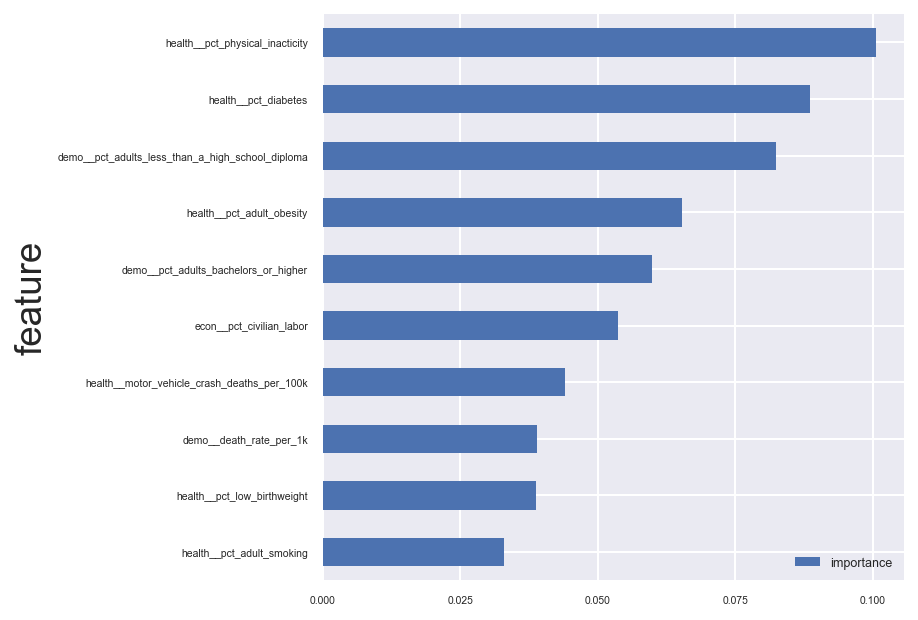

In [42]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = RFG_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features=features.iloc[-10:,:]
f, ax = plt.subplots(1, 1,figsize=(5,5))
features.set_index('feature', inplace=True)
features.plot(kind='barh', ax=ax,fontsize=5)
ax.legend(prop={'size': 6})
RFG_top10=features.index.tolist()

We can find that physical-inacticity, diabetes, obesity, and smoking which related to health are on the list. However, more suprised for me is that educational level has a high importance. It might be just a coincidence, but it is still important in our RandomForestRegressor model.

##### XGBRegressor 

The steps of following tree-based model are the same with RandomForestRegressor except the parameters we have to tune.  

In [43]:
run_gs= False

if run_gs:
    parameter_grid={
                 
                 'max_depth' : [20],
                 'min_child_weight': [4,6,8],
                 'gamma': [0.3,0.5,0.7 ],
                                    }

    forest=xgb.XGBRegressor()
    cross_validation=StratifiedKFold(n_splits=5)

    grid_search=GridSearchCV(forest,
                            scoring='neg_mean_squared_error',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1)

    grid_search.fit(x_train,y_train.values.ravel())
    model= grid_search

    parameters=grid_search.best_params_


    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters = {'gamma': 0.5, 'max_depth': 20, 'min_child_weight': 6}
    xgb_model=xgb.XGBRegressor()
    xgb_model.fit(x_train,y_train)

In [44]:
print(compute_score(xgb_model,x_train,y_train))

[-1015.41189368  -942.39518841 -1013.8749051   -909.3104795
  -877.82659757]


In [45]:
#mean_squared_error(y_test,xgb_model.predict(x_test))

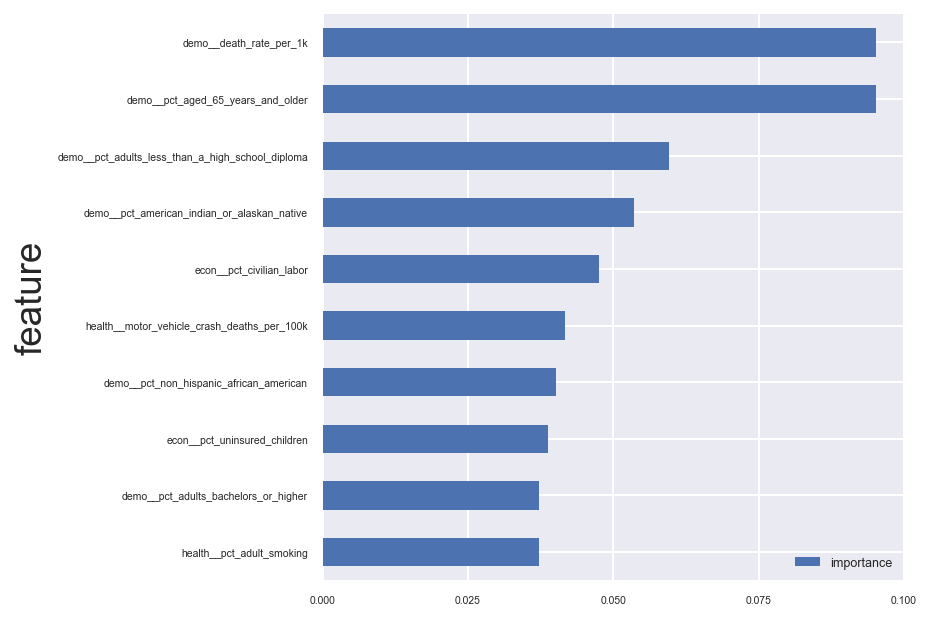

In [46]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = xgb_model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features=features.iloc[-10:,:]
f, ax = plt.subplots(1, 1,figsize=(5,5))
features.set_index('feature', inplace=True)
features.plot(kind='barh', ax=ax,fontsize=5)
ax.legend(prop={'size': 6})
xgb_top10=features.index.tolist()

#####   GradiendBosstingRegressor

In [47]:
run_gs= False

if run_gs:
    parameter_grid={
                 'max_depth' : [10,20,40],
                 'n_estimators': [100,200,300],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'learning_rate':[0.01,0.05]               
                                    }

    forest=GradientBoostingRegressor()
    cross_validation=StratifiedKFold(n_splits=5)

    grid_search=GridSearchCV(forest,
                            scoring='neg_mean_squared_error',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1)

    grid_search.fit(x_train,y_train.values.ravel())
    model= grid_search

    parameters=grid_search.best_params_


    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters =  {'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}

    GBoost=GradientBoostingRegressor(**parameters)
    GBoost.fit(x_train,y_train)

In [48]:
print(compute_score(GBoost,x_train,y_train))

[-699.17064875 -677.61939842 -731.11342747 -670.49746461 -584.58796236]


In [49]:
#mean_squared_error(y_test,GBoost.predict(x_test))

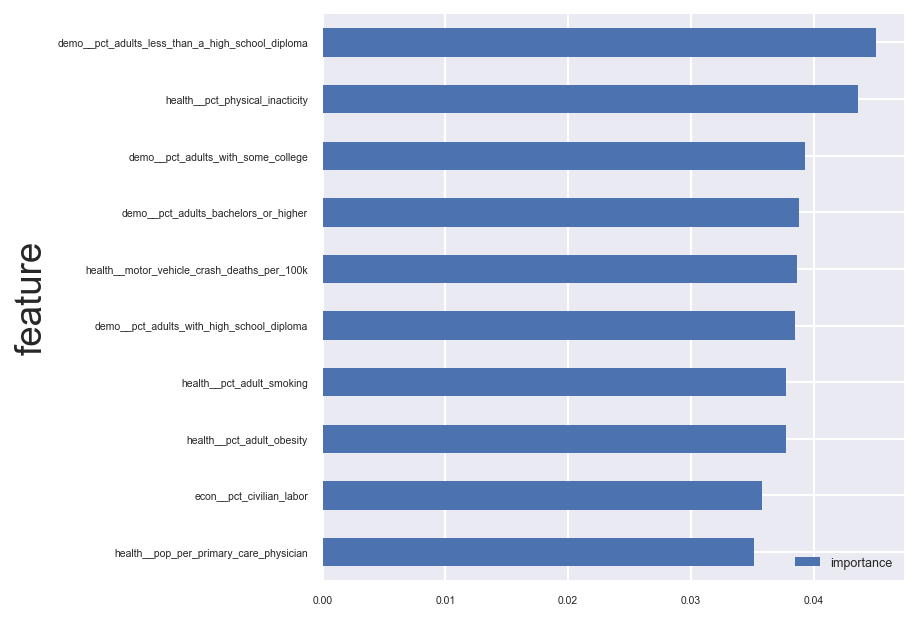

In [50]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = GBoost.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features=features.iloc[-10:,:]
f, ax = plt.subplots(1, 1,figsize=(5,5))
features.set_index('feature', inplace=True)
features.plot(kind='barh', ax=ax,fontsize=5)
ax.legend(prop={'size': 6})

GBoost_top10=features.index.tolist()

##### LGBMRegressor 

In [51]:
run_gs= False

if run_gs:
    parameter_grid={
                 'max_depth' : [-1,20,40],
                 'min_data_in_leaf' :[20,30],
                 'n_estimators' :[800],
                 'learning_rate' :[0.05,0.03]               
                                    }

    forest=lgb.LGBMRegressor()
    cross_validation=StratifiedKFold(n_splits=5)

    grid_search=GridSearchCV(forest,
                            scoring='neg_mean_squared_error',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1)

    grid_search.fit(x_train,y_train.values.ravel())
    model= grid_search

    parameters=grid_search.best_params_


    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

else:
    parameters =  {'learning_rate': 0.05, 'max_depth': 20, 'min_data_in_leaf': 20, 'n_estimators': 800}

    LGBMR=lgb.LGBMRegressor(**parameters)
    LGBMR.fit(x_train,np.array(y_train.iloc[:,0]))

In [52]:
print(compute_score(LGBMR,x_train,y_train))

[-699.9450772  -695.89753181 -737.28851519 -672.00464963 -581.09460175]


In [53]:
#mean_squared_error(y_test,LGBMR.predict(x_test))

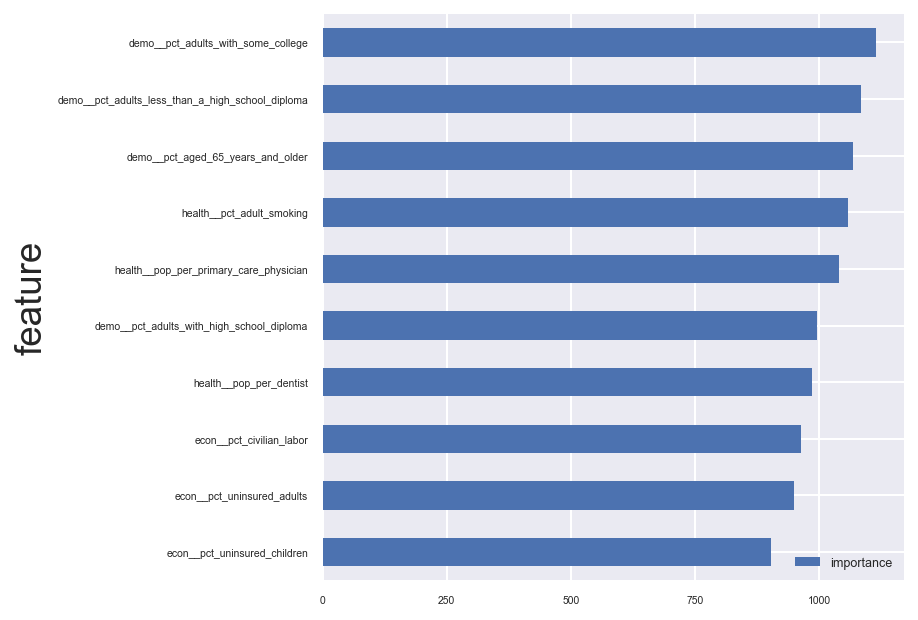

In [54]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = LGBMR.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features=features.iloc[-10:,:]
f, ax = plt.subplots(1, 1,figsize=(5,5))
features.set_index('feature', inplace=True)
features.plot(kind='barh', ax=ax,fontsize=5)
ax.legend(prop={'size': 6})
LGBMR_top10=features.index.tolist()

In [55]:
#Find the intersection of the four top10 important feature
s1=set(RFG_top10)
s2=set(xgb_top10)
s3=set(GBoost_top10)
s4=set(LGBMR_top10)
print(s1&s2&s3&s4)

del s1,s2,s3,s4

{'demo__pct_adults_less_than_a_high_school_diploma', 'health__pct_adult_smoking', 'econ__pct_civilian_labor'}


We can find that the educational level have a high importance in these all models, especially the 'demo__pct_adults_less_than_a_high_school_diploma.' Thus, the educational level having a high relationship might not be a coincidence. If we look back to scatter plots, we will find that it seems to also have strong positive relationship with heart_disease_mortality. Besdies, civilian labor force('civilian_labor') and smoking percent are also all lised on the top 10 of these four model. 

### Linear Regression model

We would also add some linear regression models to our ensemble, trying to get a better performance. I find that add some linear regression models may decrease the score in local test, but get better score on the competition. 

##### LassoCV 

In [56]:
lassocv = LassoCV(eps=1e-7) 
lassocv.fit(x_train,y_train.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=None, eps=1e-07, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [57]:
#mean_squared_error(y_test,lassocv.predict(x_test))
print(compute_score(lassocv,x_train,y_train))

[-1182.92402857 -1015.91762662 -1176.08573177 -1005.11884181
 -1003.4902276 ]


##### Ridge 

In [58]:
ridge = Ridge(alpha=1e-8) 
ridge.fit(x_train,y_train.values.ravel())

Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
#mean_squared_error(y_test,ridge.predict(x_test))
print(compute_score(ridge,x_train,y_train))

[-1191.24501326 -1012.30984724 -1180.30528201  -990.42001506
  -998.28476312]


##### LassoLarsCV 

In [60]:
lassolarscv = LassoLarsCV(eps=1e-7)
lassolarscv.fit(x_train,y_train.values.ravel())

LassoLarsCV(copy_X=True, cv=None, eps=1e-07, fit_intercept=True, max_iter=500,
      max_n_alphas=1000, n_jobs=1, normalize=True, positive=False,
      precompute='auto', verbose=False)

In [61]:
#mean_squared_error(y_test,lassolarscv.predict(x_test))

print(compute_score(lassolarscv,x_train,y_train))

[-1179.51054348 -1012.30984716 -1176.7740204  -1000.4844761
 -1010.36381942]


##### ElasticNetCV 

In [62]:
elasticnetcv = ElasticNetCV(eps=1e-10)
elasticnetcv.fit(x_train,y_train.values.ravel())

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=1e-10, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [63]:
#mean_squared_error(y_test,elasticnetcv.predict(x_test))
print(compute_score(elasticnetcv,x_train,y_train))

[-1188.62157439 -1013.08755098 -1178.59498808  -992.59049207
  -999.53030699]


### Is many better than one? 

This part is testing that does the ensemble perform better than single model. We can also try different ways of combining our models here and test each way's performance.

In [64]:
#linear_predict=(lassocv.predict(x_test)+ridge.predict(x_test).ravel()+lassolarscv.predict(x_test)+elasticnetcv.predict(x_test))/4

In [65]:
#mean_squared_error(y_test,linear_predict)

In [66]:
#tree_predict=(GBoost.predict(x_test)*0.3+xgb_model.predict(x_test)*0.1+RFG_model.predict(x_test)*0.3+LGBMR.predict(x_test)*0.3)

In [67]:
#mean_squared_error(y_test,tree_predict)

In [68]:
#mean_squared_error(y_test,tree_predict*0.9+linear_predict*0.1)

#  Predict Test

The final step is to predict the test labels. Things are simple here. Treat the test data as we treat the training data, use the model we build to predict test labels, and then wrap the output according to the submission requirement.

In [69]:
x=pd.read_csv('DAT102x_Predicting_Heart_Disease_Mortality_-_Test_values.csv',index_col=0)

In [70]:
x.drop('health__homicides_per_100k',axis=1,inplace=True)

In [71]:
x['econ__pct_uninsured_adults']=x['econ__pct_uninsured_adults'].fillna(x['econ__pct_uninsured_adults'].mean())
x['econ__pct_uninsured_children']=x['econ__pct_uninsured_children'].fillna(x['econ__pct_uninsured_children'].mean())
x['demo__pct_female']=x['demo__pct_female'].fillna(x['demo__pct_female'].mean())
x['demo__pct_below_18_years_of_age']=x['demo__pct_below_18_years_of_age'].fillna(x['demo__pct_below_18_years_of_age'].mean())
x['demo__pct_aged_65_years_and_older']=x['demo__pct_aged_65_years_and_older'].fillna(x['demo__pct_aged_65_years_and_older'].mean())
x['demo__pct_hispanic']=x['demo__pct_hispanic'].fillna(x['demo__pct_hispanic'].mean())
x['demo__pct_non_hispanic_african_american']=x['demo__pct_non_hispanic_african_american'].fillna(x['demo__pct_non_hispanic_african_american'].mean())
x['demo__pct_non_hispanic_white']=x['demo__pct_non_hispanic_white'].fillna(x['demo__pct_non_hispanic_white'].mean())
x['demo__pct_american_indian_or_alaskan_native']=x['demo__pct_american_indian_or_alaskan_native'].fillna(x['demo__pct_american_indian_or_alaskan_native'].mean())
x['demo__pct_asian']=x['demo__pct_asian'].fillna(x['demo__pct_asian'].mean())
x['health__pct_adult_obesity']=x['health__pct_adult_obesity'].fillna(x['health__pct_adult_obesity'].mean())
x['health__pct_diabetes']=x['health__pct_diabetes'].fillna(x['health__pct_diabetes'].mean())
x['health__pct_physical_inacticity']=x['health__pct_physical_inacticity'].fillna(x['health__pct_physical_inacticity'].mean())

In [72]:
#Having large number of missing values
x['health__pct_adult_smoking']=x['health__pct_adult_smoking'].fillna(x['health__pct_adult_smoking'].median())
x['health__pct_low_birthweight']=x['health__pct_low_birthweight'].fillna(x['health__pct_low_birthweight'].median())
x['health__pct_excessive_drinking']=x['health__pct_excessive_drinking'].fillna(x['health__pct_excessive_drinking'].mean())
x['health__air_pollution_particulate_matter']=x['health__air_pollution_particulate_matter'].fillna(x['health__air_pollution_particulate_matter'].median())
x['health__motor_vehicle_crash_deaths_per_100k']=x['health__motor_vehicle_crash_deaths_per_100k'].fillna(x['health__motor_vehicle_crash_deaths_per_100k'].mean())
x['health__pop_per_dentist']=x['health__pop_per_dentist'].fillna(x['health__pop_per_dentist'].median())
x['health__pop_per_primary_care_physician']=x['health__pop_per_primary_care_physician'].fillna(x['health__pop_per_primary_care_physician'].median())

In [73]:
x=process_area__rucc(x)
x=process_area__urban_influence(x)
x=process_econ__economic_typology(x)
x=process_yr(x)

In [74]:
x_test=x

In [75]:
linear_predict=(lassocv.predict(x_test)+ridge.predict(x_test).ravel()+lassolarscv.predict(x_test)+elasticnetcv.predict(x_test))/4

#By the score, I decide not to add Xgboost in the ensemble.
tree_predict=(GBoost.predict(x_test)+RFG_model.predict(x_test)+LGBMR.predict(x_test))/3
#tree_predict=(GBoost.predict(x_test)*0.3+xgb_model.predict(x_test)*0.1+RFG_model.predict(x_test)*0.3+LGBMR.predict(x_test)*0.3)


In [76]:
output = tree_predict*0.5+linear_predict*0.5
output=output.astype(int)

We can simply check whether our prediction is strange or not by plotting the prediction. We can expect that test labels distribute like training labels. However, maybe they should actually distribute very differently. No matter what the fact is, the score on the competition will tell we the truth. 

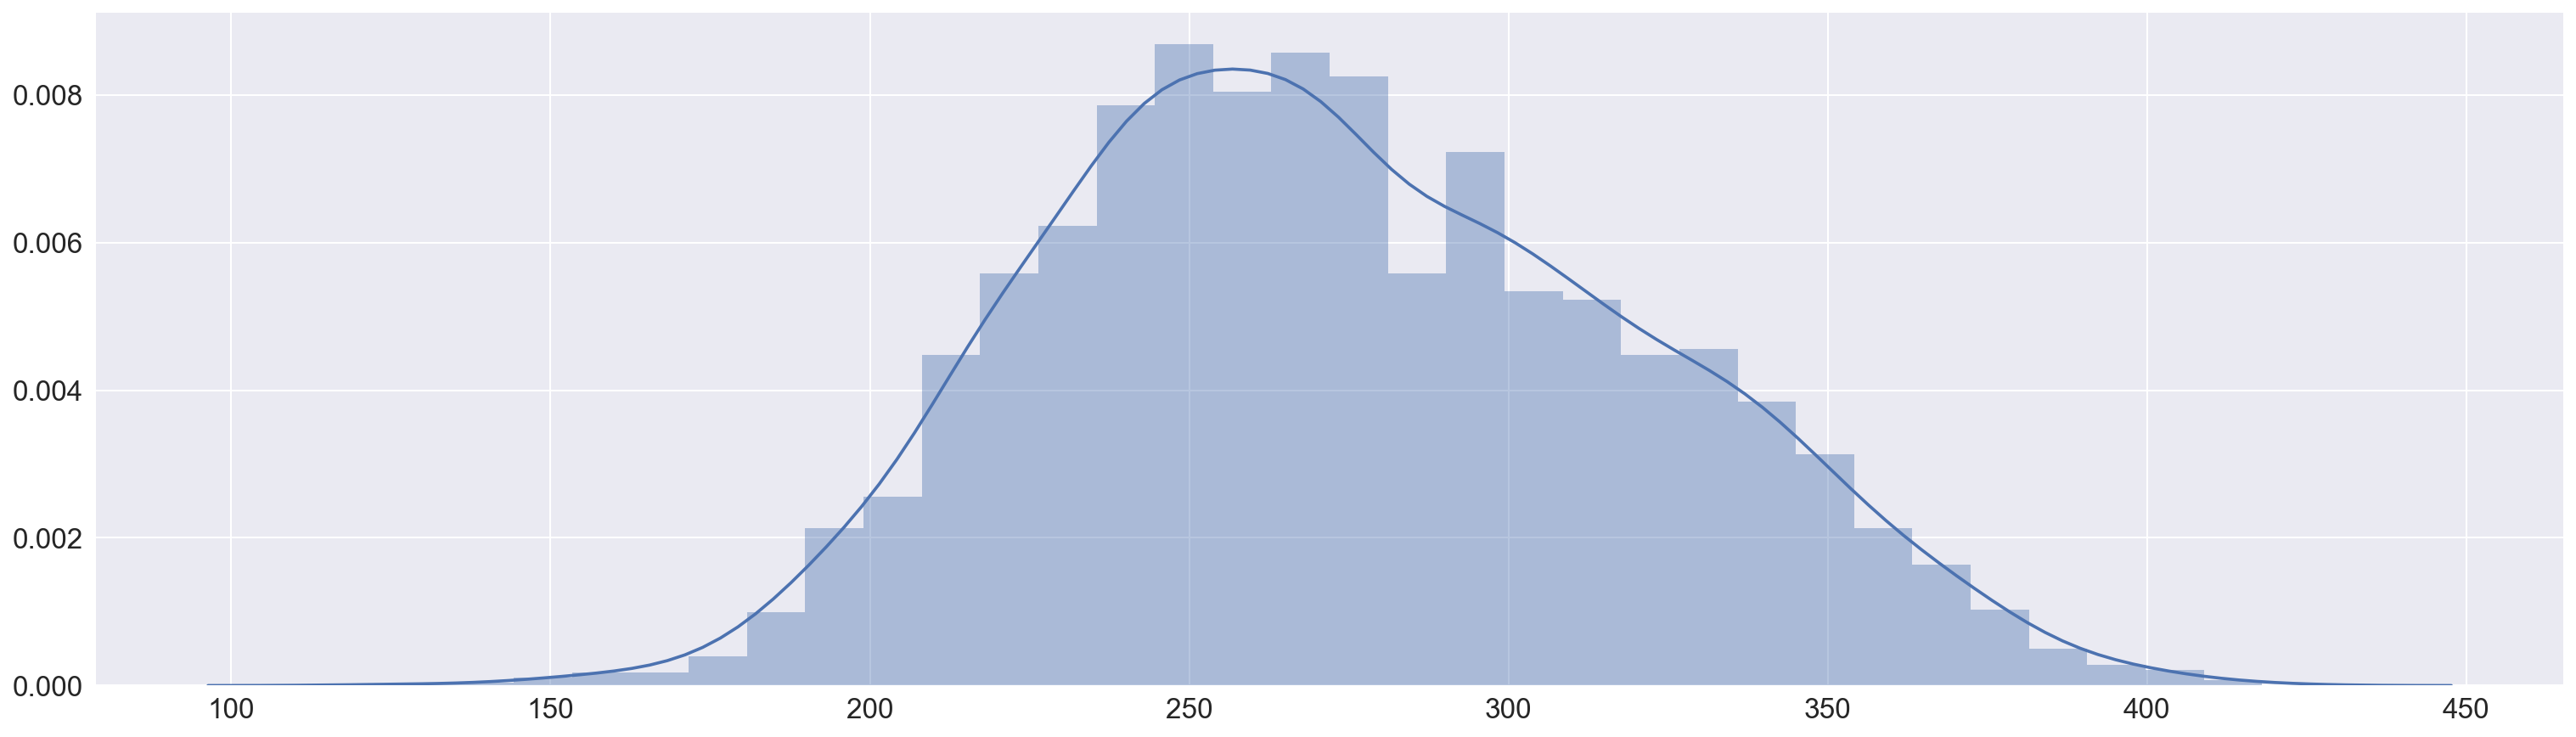

In [77]:
sns.distplot(output)

In [78]:
df_output = pd.DataFrame()
aux = pd.read_csv('DAT102x_Predicting_Heart_Disease_Mortality_-_Test_values.csv')
df_output['row_id'] = aux['row_id']
df_output['heart_disease_mortality_per_100k'] = output
df_output[['row_id','heart_disease_mortality_per_100k']].to_csv('heart_disease_mortality_per_100k.csv', index=False)

# Conclusion 

The model we build here has the best score 31.2720 RMSE. The most significant feature the analysis showing is the educational level, especially the percent of adult population which has a high school diploma as highest level of education achieved. I think the reason is that the educational level reflects the development of a county. Some other features related to health are also considered important, like smoking, physical inacticity, obesity and diabetes. In conclusion, with some machine learning techniques and good data, we can make a prediction of heart diease rate at the county-level that doese not differ from the truth too large.